In [1]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# GARCH(2,2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 = 1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

    

In [2]:

# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

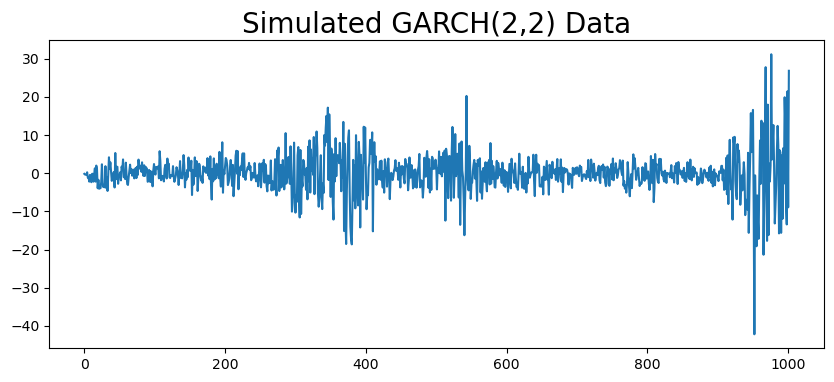

In [3]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data',fontsize=20)

Text(0.5, 1.0, 'Data volatility')

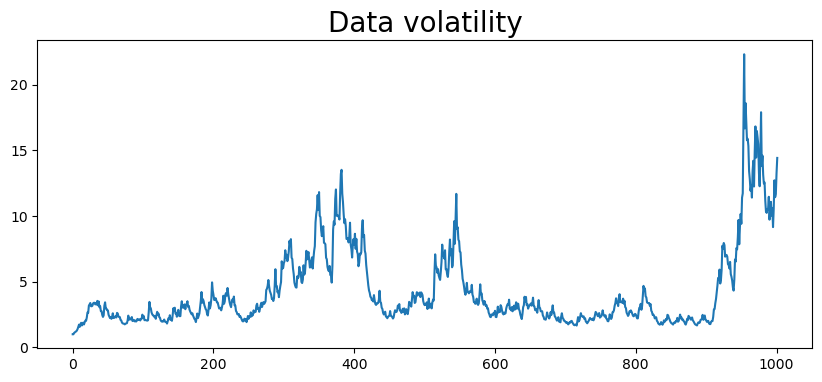

In [4]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data volatility',fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

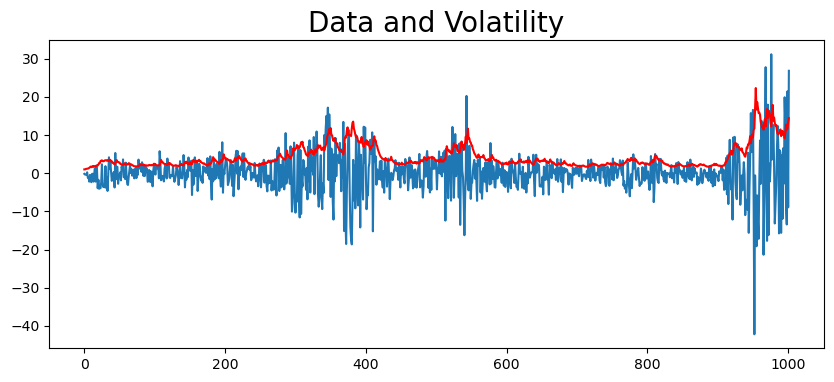

In [5]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

## PACF plot

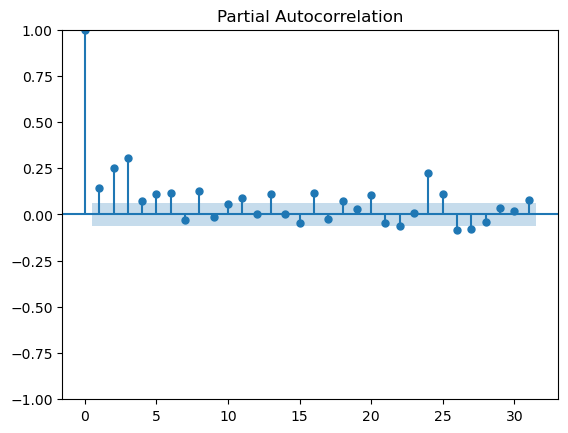

In [6]:
plot_pacf(np.array(series)**2)
plt.show()

## Fit the GARCH model

In [7]:
train, test = series[:-test_size], series[-test_size:]


In [8]:
model = arch_model(train, p=2, q=2)


In [9]:
model_fit = model.fit()


Iteration:      1,   Func. Count:      8,   Neg. LLF: 8466996178.053968
Iteration:      2,   Func. Count:     17,   Neg. LLF: 349559.0557231749
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2646.6723424334436
Iteration:      4,   Func. Count:     35,   Neg. LLF: 2302.62807844724
Iteration:      5,   Func. Count:     43,   Neg. LLF: 2299.4427808506744
Iteration:      6,   Func. Count:     51,   Neg. LLF: 2284.102118247585
Iteration:      7,   Func. Count:     59,   Neg. LLF: 2279.596224198647
Iteration:      8,   Func. Count:     67,   Neg. LLF: 2282.9582150855704
Iteration:      9,   Func. Count:     75,   Neg. LLF: 2278.223262770485
Iteration:     10,   Func. Count:     83,   Neg. LLF: 2278.0104394459704
Iteration:     11,   Func. Count:     91,   Neg. LLF: 2277.698955438518
Iteration:     12,   Func. Count:     98,   Neg. LLF: 2277.697320020636
Iteration:     13,   Func. Count:    105,   Neg. LLF: 2277.697289712069
Iteration:     14,   Func. Count:    112,   Neg. LLF: 2277.69

In [10]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2277.70
Distribution:                  Normal   AIC:                           4567.39
Method:            Maximum Likelihood   BIC:                           4596.22
                                        No. Observations:                  902
Date:                Wed, Aug 14 2024   Df Residuals:                      901
Time:                        00:23:02   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.1224  8.402e-02     -1.457      0.145 [ -0.287,4.225e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2805      0.122      2.298  2.154e-02  [4.130e-02,  0.520]
alpha[1]       0.0625  3.608e-02      1.733  8.309e-02 [-8.188e-03,  0.133]
alpha[2]       0.1996  4.431e-02      4.505  6.642e-06    [  0.113,  0.286]
beta[1]        0.2023      0.138      1.471      0.141 [-6.726e-02,  0.472]
beta[2]        0.5221      0.126      4.159  3.199e-05    [  0.276,  0.768]
===========================================================================

Covariance estimator: robust
"""

## Predict

In [11]:
predictions = model_fit.forecast(horizon=test_size)


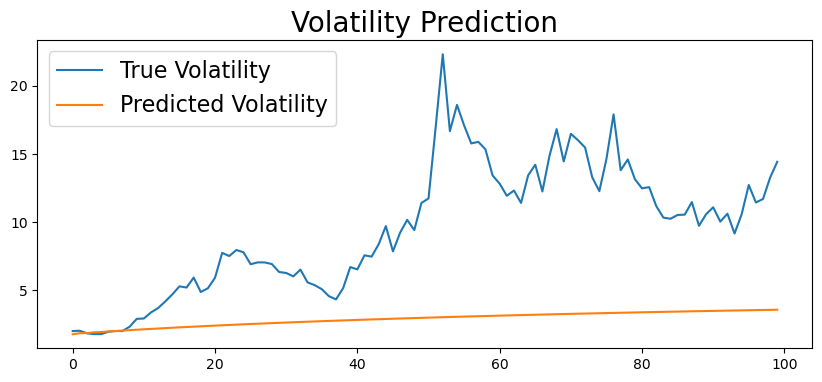

In [12]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)


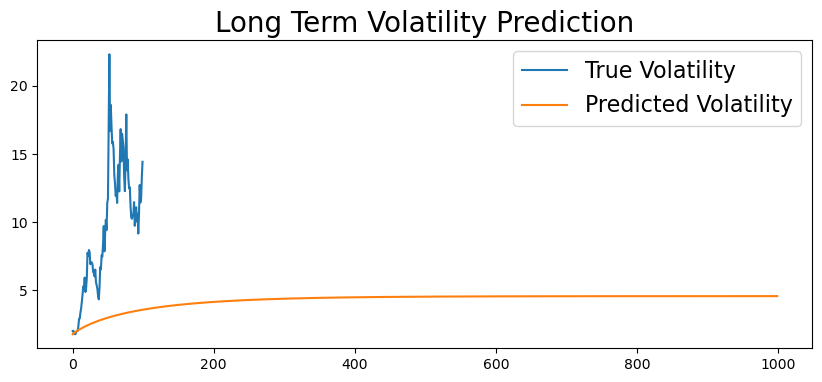

In [13]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

## Rolling forecast origin

In [14]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

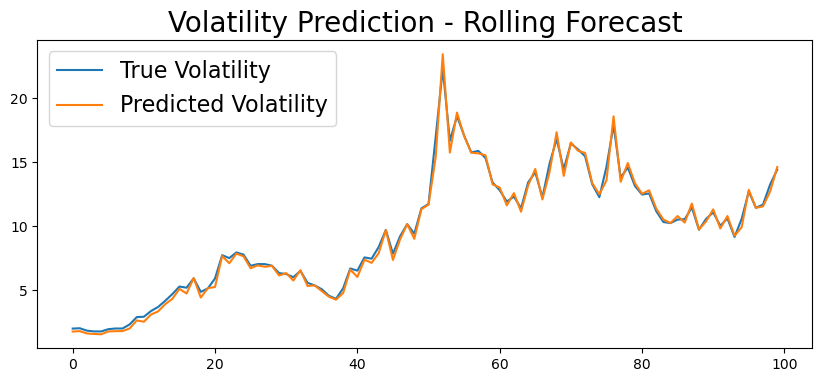

In [15]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

## Garch stock forecasting


## Read Data

In [16]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np


## DIS volatility

In [17]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)